<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/XMIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis(1) (1).csv')
df2 = df[df['train'] == 1]
print(df2['y'].max())
ymax_train1 = df2['y'].max()
# sve sa train = 0 y = max(y) + 1

#for i in range(df.shape[0]):
 # if(df.iloc[i]['train'] == 0):
  #  df.loc[i, 'y'] = ymax_train1 + 1

lower_bound = df['n'] * df['av.length'] / df['m']
lower_bound = lower_bound.astype('int') + 1

upper_bound = np.minimum(df[' LPTUB'], df[' SLACKUB'])
df['rel. bound'] = (upper_bound-lower_bound)/(upper_bound)
df['rel. bound'] = df['rel. bound']*10000

df['category'] = df['y']
for i in range(df.shape[0]):
  #print(df.iloc[i]['y'])
  if(df.iloc[i]['y'] < 1):
    df.loc[i, 'category'] = 0
  elif(df.iloc[i]['y'] >= 1 and df.iloc[i]['y'] < 10):
    df.loc[i, 'category'] = 1
  else:
    df.loc[i, 'category'] = 2

print(df['category'].max())
print(df['y'].max())

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = [ 'index', 'inst.name','type', 'CPLEXStatus', ' LPTUB', 'train', ' SLACKUB'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




19.907111
2.0
19.907111


In [2]:
y_new = []
for val in y:
  if(val<1):
    y_new.append(0)
  elif(1 <= val and val <10):
    y_new.append(1)
  else:
    y_new.append(2)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)
X_modified = X

In [3]:
from imblearn.over_sampling import RandomOverSampler

names = ['min', 'n/m', 'std.dev','av.length']
X_modified = X.drop([  'indeks',  '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3'], axis = 1)
X_modified['n/m'] = X_modified['n/m']
print(X_modified.head())
# n, class, subtype, 'rel. bound','av.length'


from imblearn.over_sampling import RandomOverSampler

category = X_modified['category']
tmp = X_modified.drop(['category'], axis = 1)
tmp['y_enc'] = y_encoded


oversample = RandomOverSampler(random_state=0)
tmp, category = oversample.fit_resample(tmp, category.astype('int'))

tmp = tmp.sample(frac = 1).reset_index()
y_encoded = tmp['y_enc']
X_modified = tmp.drop(['y_enc'], axis = 1)
print(X_modified.shape[0])
print(X_modified.head())


   subtype  class    n   m   n/m       m/n   av.length     std.dev  median  \
0       10      3  140  28  5.00  0.200000   74.571426   13.985677    74.0   
1        2      6   54  24  2.25  0.444444  134.166672   44.849751   136.5   
2        2      4  162  72  2.25  0.444444  103.512344   20.082205   106.0   
3       12      6   18   2  9.00  0.111111   45.666668   14.852214    49.5   
4        3      7  180  72  2.50  0.400000  720.972229  179.274765   730.0   

   range  min   max    k          y   rel. bound  category  
0     49   51   100   49   0.000676    53.333333       0.0  
1    152   63   215   46   1.357883   289.389068       1.0  
2    106   52   158   70   6.100800  1174.242424       1.0  
3     49   23    72   15   0.000013   -24.330900       0.0  
4   1013  224  1237  160  12.142030   777.493606       2.0  
21840
   index  subtype  class    n   m   n/m       m/n   av.length     std.dev  \
0  16732        2      7  162  72  2.25  0.444444  650.623474  149.428650   
1  12

In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = X_train.drop(['y'], axis = 1)
print(X_train.head())

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = X_test.drop(['y'], axis = 1)

X_test = sc.transform(X_test)


19656
2184
       index  subtype  class    n   m   n/m       m/n   av.length     std.dev  \
13709  15756        4      7  198  72  2.75  0.363636  800.040405  203.103653   
3388   15298        3      7  180  72  2.50  0.400000  726.744446  171.113617   
15259    865        4      4   66  24  2.75  0.363636  100.030304   19.374027   
5806   10293        2      6  162  72  2.25  0.444444  398.388885  137.701538   
15796   6341       11      1   54   9  6.00  0.166667   46.333332   25.662542   

       median  range  min   max    k  rel. bound  
13709   819.0   1024  225  1249  179  463.604853  
3388    735.0    970  293  1263  159  795.339412  
15259    99.0     81   62   143   46  515.463918  
5806    396.0    481  163   644  140  228.758170  
15796    47.5     90    1    91   44  106.761566  


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(16, input_dim = X_modified.shape[1]-1, activation='relu'))

classifier.add(Dropout(0.2))

classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(3, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                256       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 32, 
                    epochs = 120, shuffle = True)


Epoch 1/120
615/615 [==============================] - 3s 3ms/step - loss: 0.4190 - accuracy: 0.8265
Epoch 2/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1955 - accuracy: 0.9239
Epoch 3/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1583 - accuracy: 0.9364
Epoch 4/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1399 - accuracy: 0.9392
Epoch 5/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1275 - accuracy: 0.9451
Epoch 6/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1201 - accuracy: 0.9493
Epoch 7/120
615/615 [==============================] - 2s 4ms/step - loss: 0.1143 - accuracy: 0.9501
Epoch 8/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1083 - accuracy: 0.9549
Epoch 9/120
615/615 [==============================] - 2s 3ms/step - loss: 0.1057 - accuracy: 0.9545
Epoch 10/120
615/615 [==============================] - 1s 2ms/step - loss: 0.1037 - accura

accuracy: 96.61%


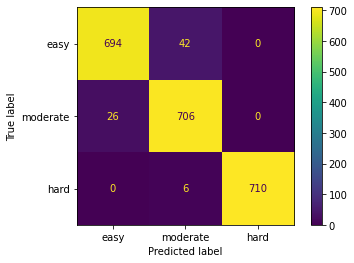

In [8]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard'])

cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')


ROC AUC score: 0.9746703527188062


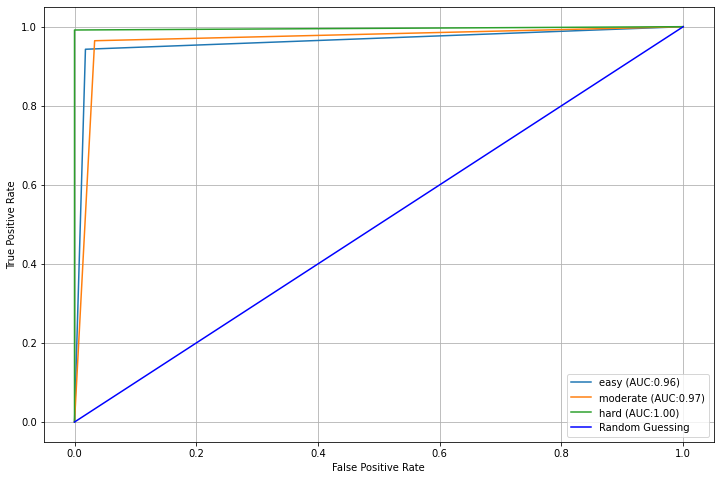

In [9]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()

In [10]:
column_names = ['std.dev', 'rel. bound', 'min', 'av.length', 'm', 'y']
df_reg = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 2):
    dictionary = {'std.dev' : X_test_copy.iloc[i]['std.dev'], 'min': X_test_copy.iloc[i]['min'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_reg = df_reg.append(dictionary, ignore_index = True)

2184
2184


In [11]:
column_names = ['class', 'rel. bound', 'min', 'n', 'av.length', 'y']
df_regm = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 1):
    dictionary = {'class' : X_test_copy.iloc[i]['class'], 'min': X_test_copy.iloc[i]['min'], 'n' : X_test_copy.iloc[i]['n'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_regm = df_regm.append(dictionary, ignore_index = True)

2184
2184


In [12]:
column_names = ['n/m', 'rel. bound', 'm', 'av.length', 'y']
df_rege = pd.DataFrame(columns = column_names)
print(X_test_copy.shape[0])
print(len(pred))
for i in range(len(pred)):
  if(pred_[i] == 0):
    dictionary = {'n/m' : X_test_copy.iloc[i]['n/m'], 'm' : X_test_copy.iloc[i]['m'],
                  'av.length' : X_test_copy.iloc[i]['av.length'], 'rel. bound' : X_test_copy.iloc[i]['rel. bound'],
                   'y': X_test_copy.iloc[i]['y']}
    df_rege = df_rege.append(dictionary, ignore_index = True)

2184
2184


In [13]:
print(df_reg.head(5))
print(df_regm.head(5))
print(df_rege.head(5))

yy_final = []
predd_final = []

      std.dev   rel. bound    min   av.length     m          y
0  148.578339  1139.927624  197.0  652.493835  72.0  16.347333
1  156.741806   711.237553  208.0  652.887512  80.0  12.363228
2  172.043365  1046.831956  275.0  721.877808  80.0  12.620737
3  137.693039   422.442244    2.0  527.439392  48.0  10.756295
4  171.113617   795.339412  293.0  726.744446  72.0  13.121928
   class   rel. bound    min      n   av.length         y
0    4.0   529.801325   67.0   44.0  103.659088  1.966105
1    2.0   728.476821   22.0   54.0   62.148148  1.693714
2    3.0   585.585586   50.0  198.0   75.742424  7.283787
3    3.0  1042.654028   50.0  120.0   75.308334  4.879916
4    7.0   754.985755  184.0  144.0  576.520813  2.736417
    n/m   rel. bound     m   av.length         y
0   2.0  1891.891892  80.0  104.562500  0.000079
1  11.0     5.947661  10.0  458.200012  0.000809
2   4.0    33.112583  50.0   75.160004  0.000788
3  11.0     0.000000   4.0   74.659088  0.000021
4   9.0    19.011407   8.0   

In [14]:
shuffled = df_reg.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [15]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow as tf
from tensorflow import keras 
from tensorflow.python.ops import math_ops


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 20/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu'))
    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [16]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


36/36 [==============================] - 1s 2ms/step - loss: 10.4512
Epoch 2/300
36/36 [==============================] - 0s 2ms/step - loss: 8.5875
Epoch 3/300
36/36 [==============================] - 0s 2ms/step - loss: 6.3790
Epoch 4/300
36/36 [==============================] - 0s 2ms/step - loss: 4.6872
Epoch 5/300
36/36 [==============================] - 0s 2ms/step - loss: 3.9942
Epoch 6/300
36/36 [==============================] - 0s 2ms/step - loss: 3.5240
Epoch 7/300
36/36 [==============================] - 0s 2ms/step - loss: 3.5894
Epoch 8/300
36/36 [==============================] - 0s 2ms/step - loss: 3.3358
Epoch 9/300
36/36 [==============================] - 0s 2ms/step - loss: 3.3599
Epoch 10/300
36/36 [==============================] - 0s 2ms/step - loss: 3.3135
Epoch 11/300
36/36 [==============================] - 0s 2ms/step - loss: 3.0701
Epoch 12/300
36/36 [==============================] - 0s 2ms/step - loss: 3.1701
Epoch 13/300
36/36 [============================

In [17]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

9/9 [==============================] - 0s 2ms/step
r_square score:  0.8793189704437256
RMSE:


0.7163172860866475

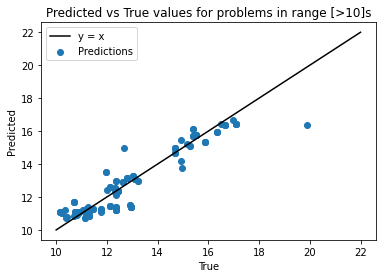

In [18]:
x = np.linspace(10, 22, 100)
y = x
plt.title('Predicted vs True values for problems in range [>10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [19]:
shuffled = df_regm.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [20]:

def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 10/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu'))

    #model.add(Dense(32, activation = 'relu'))
    #model.add(Dense(8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [21]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


38/38 [==============================] - 1s 2ms/step - loss: 6.4266
Epoch 2/300
38/38 [==============================] - 0s 2ms/step - loss: 4.9001
Epoch 3/300
38/38 [==============================] - 0s 2ms/step - loss: 3.9836
Epoch 4/300
38/38 [==============================] - 0s 2ms/step - loss: 3.6319
Epoch 5/300
38/38 [==============================] - 0s 2ms/step - loss: 3.5551
Epoch 6/300
38/38 [==============================] - 0s 2ms/step - loss: 3.5185
Epoch 7/300
38/38 [==============================] - 0s 2ms/step - loss: 3.4368
Epoch 8/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3256
Epoch 9/300
38/38 [==============================] - 0s 2ms/step - loss: 3.2844
Epoch 10/300
38/38 [==============================] - 0s 2ms/step - loss: 3.2726
Epoch 11/300
38/38 [==============================] - 0s 2ms/step - loss: 3.3228
Epoch 12/300
38/38 [==============================] - 0s 2ms/step - loss: 3.0956
Epoch 13/300
38/38 [=============================

In [22]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])
print("RMSE:")
sqrt(mean_squared_error(yy, predd))

10/10 [==============================] - 0s 2ms/step
r_square score:  0.5619810554129581
RMSE:


1.5713688990399728

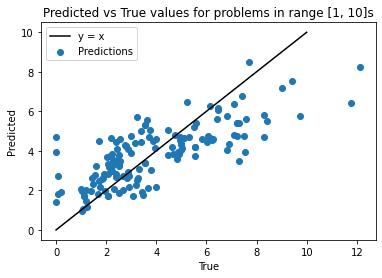

In [23]:
x = np.linspace(0, 10, 100)
y = x
plt.title('Predicted vs True values for problems in range [1, 10]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [24]:
shuffled = df_rege.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
#y = np.log(y + 100)
X_modified = X

In [25]:
def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,3.5))
    return 1/(1+K.exp(-x))


get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(12, input_dim=X_modified.shape[1], activation='relu'))
        
    model.add(Dropout(0.25))



    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = custom_activation))
    model.compile(loss='mean_squared_error', optimizer="Adam")
    return model

In [26]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.8)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=300, batch_size=16, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


36/36 [==============================] - 0s 2ms/step - loss: 0.3855
Epoch 2/300
36/36 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 3/300
36/36 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 4/300
36/36 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 5/300
36/36 [==============================] - 0s 2ms/step - loss: 0.2114
Epoch 6/300
36/36 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 7/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1910
Epoch 8/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1786
Epoch 9/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1773
Epoch 10/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1672
Epoch 11/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 12/300
36/36 [==============================] - 0s 2ms/step - loss: 0.1640
Epoch 13/300
36/36 [=============================

In [27]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#yy = np.exp(yy) - 100
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)
#predd = np.exp(predd)-100
#predd = np.power(predd, 10)/10
print("r_square score: ", r2_score(y_test,prediction))

from sklearn.metrics import mean_squared_error
from math import sqrt

for i in range(len(yy)):
  yy_final.append(yy[i])
  predd_final.append(predd[i])

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

9/9 [==============================] - 0s 2ms/step
r_square score:  0.27301352871307816
RMSE:


0.590947702093768

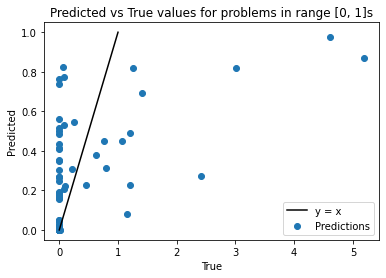

In [28]:
x = np.linspace(0, 1, 100)
y = x
plt.title('Predicted vs True values for problems in range [0, 1]s')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy, predd)
plt.legend(['y = x', 'Predictions'])

In [29]:
print("r_square score: ", r2_score(yy_final, predd_final))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(yy_final)
#yy = np.power(yy, 10)/10
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(predd_final)
#predd = np.power(predd, 10)/10

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd))

r_square score:  0.9634786482688724
RMSE:


1.0653675251756551

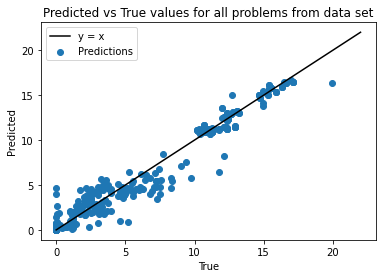

In [30]:
x = np.linspace(0, 22, 2000)
y = x

plt.title('Predicted vs True values for all problems from data set')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot(x,y, color = 'black')
plt.scatter(yy_final, predd_final)
plt.legend(['y = x', 'Predictions'])